### Case study  - Uber Data Analysis

The data of a driver’s uber trips are available for year 2016.
Your manager wants you to explore this data to give him some useful insights about the trip behaviour of a Uber driver.

#### Dataset - 
The dataset contains Start Date, End Date, Start Location, End Location, Miles Driven and Purpose of drive (Business, Personal, Meals, Errands, Meetings, Customer Support etc.)


#### Steps - 

1.Import the libraries

2.Get the data and observe it

3.Check missing values, either remove it or fill it.

4.Get summary of data using python function.

5.Explore the data parameter wise

Here we have information of destination(start and stop), time(start and stop), category and purpose of trip, miles covered.


In [1]:
# ----------------------
# Concepts To cover 
# ----------------------
# 1. Data profiling
# 2. group by function
# 3. Apply function 
# 4. DateTime operations 

In [ ]:
!pip install pandas==1.0.5
!pip install pandas-profiling==2.8.0

In [3]:
# Import the libraries 
import numpy as np
import pandas as pd

In [4]:
# Read the Data 


# df = pd.read_csv('../data/uberdrive.csv', skiprows = 100)  # To skip first n nows 
# df = pd.read_csv('../data/uberdrive.csv', nrows = 100)  # Load only the first n rows
# df = pd.read_csv('../data/uberdrive.csv', usecols = ['START_DATE*', 'END_DATE*'])  # Load only selected columns

df = pd.read_csv('uberdrive.csv')

In [5]:
df.head(8) # View first 8 rows of data 

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
6,1/6/2016 17:30,1/6/2016 17:35,Business,West Palm Beach,Palm Beach,7.1,Meeting
7,1/7/2016 13:27,1/7/2016 13:33,Business,Cary,Cary,0.8,Meeting


In [6]:
#View the last 10 rows of data
df.tail(10)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1146,12/30/2016 11:31,12/30/2016 11:56,Business,Kar?chi,Kar?chi,2.9,Errand/Supplies
1147,12/30/2016 15:41,12/30/2016 16:03,Business,Kar?chi,Kar?chi,4.6,Errand/Supplies
1148,12/30/2016 16:45,12/30/2016 17:08,Business,Kar?chi,Kar?chi,4.6,Meeting
1149,12/30/2016 23:06,12/30/2016 23:10,Business,Kar?chi,Kar?chi,0.8,Customer Visit
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [7]:
# understand shape and size of data 
print(df.shape)
print(df.size)

(1156, 7)
8092


In [8]:
# check info about data (includes column names, the number of non-null values in it, and data-type for each column.)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [9]:
# Same as above, gives non-null number of records
df.count()

START_DATE*    1156
END_DATE*      1155
CATEGORY*      1155
START*         1155
STOP*          1155
MILES*         1156
PURPOSE*        653
dtype: int64

1. PURPOSE column has lots of missing values  
2. 1155 or 1156 records ??

In [10]:
# Is any of the values in the df null?  (# Useful in writing validation scripts on large number of files )
df.isnull().any().any()

True

In [11]:
#Is any of the values in columns of the df null ? ( # Useful in writing validation scripts on large number of files )
df.isnull().any() 

START_DATE*    False
END_DATE*       True
CATEGORY*       True
START*          True
STOP*           True
MILES*         False
PURPOSE*        True
dtype: bool

In [12]:
null_cols = df.columns[df.isnull().any()]
null_cols = list(null_cols)
#Get the columns into a list and do use it to do some operations

In [13]:
# isnull() function checks the number of null values and sum() function sums up the count of these.
# Shows the column wise values of missing data
df.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

Show the records with missing values for column= PURPOSE 

In [14]:
df[df['PURPOSE*'].isnull()]
# you can as well do a head() function on this to just view the first n rows

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
32,1/19/2016 9:09,1/19/2016 9:23,Business,Whitebridge,Lake Wellingborough,7.2,NaN
85,2/9/2016 10:54,2/9/2016 11:07,Personal,Whitebridge,Northwoods,5.3,NaN
86,2/9/2016 11:43,2/9/2016 11:50,Personal,Northwoods,Tanglewood,3.0,NaN
87,2/9/2016 13:36,2/9/2016 13:52,Personal,Tanglewood,Preston,5.1,NaN
...,...,...,...,...,...,...,...
1066,12/19/2016 14:37,12/19/2016 14:50,Business,Unknown Location,Unknown Location,5.4,NaN
1069,12/19/2016 19:05,12/19/2016 19:17,Business,Islamabad,Unknown Location,2.2,NaN
1071,12/20/2016 8:49,12/20/2016 9:24,Business,Unknown Location,Rawalpindi,12.0,NaN
1143,12/29/2016 20:53,12/29/2016 21:42,Business,Kar?chi,Unknown Location,6.4,NaN


How many records are non-null  / have values ( in a particular column )

In [15]:
df['PURPOSE*'].count()

653

### Renaming columns

In [16]:
# Rename the columns to remove the * from the names
# Why ? we can use df.START_DATE same way as  df['START_DATE*']
col_names = ['START_DATE','END_DATE','CAT', 'START' , 'STOP' , 'MILES','PURPOSE']
df.columns = col_names


#or 
# Replace the * character from all the  columns .
# ( in case you have many columns and cant manually write the column names )
df.columns = df.columns.str.replace("*", "")

# You can also rename the specific column names 
df.rename( columns = {'CAT':'CATEGORY'})
df.head()

,START_DATE,END_DATE,CAT,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [17]:
df.head()

,START_DATE,END_DATE,CAT,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


### Filtering dataframes -1 

In [18]:
# shows the entries where PURPOSE is null
df[df.PURPOSE.isnull()]

,START_DATE,END_DATE,CAT,START,STOP,MILES,PURPOSE
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
32,1/19/2016 9:09,1/19/2016 9:23,Business,Whitebridge,Lake Wellingborough,7.2,NaN
85,2/9/2016 10:54,2/9/2016 11:07,Personal,Whitebridge,Northwoods,5.3,NaN
86,2/9/2016 11:43,2/9/2016 11:50,Personal,Northwoods,Tanglewood,3.0,NaN
87,2/9/2016 13:36,2/9/2016 13:52,Personal,Tanglewood,Preston,5.1,NaN
...,...,...,...,...,...,...,...
1066,12/19/2016 14:37,12/19/2016 14:50,Business,Unknown Location,Unknown Location,5.4,NaN
1069,12/19/2016 19:05,12/19/2016 19:17,Business,Islamabad,Unknown Location,2.2,NaN
1071,12/20/2016 8:49,12/20/2016 9:24,Business,Unknown Location,Rawalpindi,12.0,NaN
1143,12/29/2016 20:53,12/29/2016 21:42,Business,Kar?chi,Unknown Location,6.4,NaN


In [19]:
# inverting the selection ( not null ) ( works for booleans cases)
df[~df.PURPOSE.isnull()]

,START_DATE,END_DATE,CAT,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
...,...,...,...,...,...,...,...
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site


### Filtering dataframe - 2 

In [20]:
#1. Conditions within dataframe 
df[df['MILES'] > 30]

,START_DATE,END_DATE,CAT,START,STOP,MILES,PURPOSE
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
36,1/20/2016 13:25,1/20/2016 14:19,Business,Raleigh,Cary,40.2,Customer Visit
108,2/16/2016 3:21,2/16/2016 4:13,Business,Katunayaka,Unknown Location,43.7,Customer Visit
232,3/17/2016 12:52,3/17/2016 15:11,Business,Austin,Katy,136.0,Customer Visit
233,3/17/2016 15:16,3/17/2016 15:58,Business,Katy,Houston,30.2,Meeting
245,3/19/2016 14:01,3/19/2016 14:57,Business,Sugar Land,Houston,35.1,Customer Visit
246,3/19/2016 15:34,3/19/2016 16:38,Business,Houston,Galveston,36.5,Meal/Entertain
251,3/19/2016 19:33,3/19/2016 20:39,Business,Galveston,Houston,57.0,Customer Visit
268,3/25/2016 13:24,3/25/2016 16:22,Business,Cary,Latta,144.0,Customer Visit
269,3/25/2016 16:52,3/25/2016 22:22,Business,Latta,Jacksonville,310.3,Customer Visit


In [21]:
#2. SQL-like query
df.query('MILES > 30')

,START_DATE,END_DATE,CAT,START,STOP,MILES,PURPOSE
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
36,1/20/2016 13:25,1/20/2016 14:19,Business,Raleigh,Cary,40.2,Customer Visit
108,2/16/2016 3:21,2/16/2016 4:13,Business,Katunayaka,Unknown Location,43.7,Customer Visit
232,3/17/2016 12:52,3/17/2016 15:11,Business,Austin,Katy,136.0,Customer Visit
233,3/17/2016 15:16,3/17/2016 15:58,Business,Katy,Houston,30.2,Meeting
245,3/19/2016 14:01,3/19/2016 14:57,Business,Sugar Land,Houston,35.1,Customer Visit
246,3/19/2016 15:34,3/19/2016 16:38,Business,Houston,Galveston,36.5,Meal/Entertain
251,3/19/2016 19:33,3/19/2016 20:39,Business,Galveston,Houston,57.0,Customer Visit
268,3/25/2016 13:24,3/25/2016 16:22,Business,Cary,Latta,144.0,Customer Visit
269,3/25/2016 16:52,3/25/2016 22:22,Business,Latta,Jacksonville,310.3,Customer Visit


In [22]:
# inverting the selection
print(df[df.MILES == 30])
print(df[df.MILES != 30])

          START_DATE         END_DATE       CAT  ...      STOP MILES  PURPOSE
486  6/27/2016 12:22  6/27/2016 13:02  Business  ...  Metairie  30.0      NaN

[1 rows x 7 columns]
            START_DATE          END_DATE  ...    MILES          PURPOSE
0       1/1/2016 21:11    1/1/2016 21:17  ...      5.1   Meal/Entertain
1        1/2/2016 1:25     1/2/2016 1:37  ...      5.0              NaN
2       1/2/2016 20:25    1/2/2016 20:38  ...      4.8  Errand/Supplies
3       1/5/2016 17:31    1/5/2016 17:45  ...      4.7          Meeting
4       1/6/2016 14:42    1/6/2016 15:49  ...     63.7   Customer Visit
...                ...               ...  ...      ...              ...
1151  12/31/2016 13:24  12/31/2016 13:42  ...      3.9   Temporary Site
1152  12/31/2016 15:03  12/31/2016 15:38  ...     16.2          Meeting
1153  12/31/2016 21:32  12/31/2016 21:50  ...      6.4   Temporary Site
1154  12/31/2016 22:08  12/31/2016 23:51  ...     48.2   Temporary Site
1155            Totals        

Explore the details from the MILES column


In [23]:
#pd.Index([1, 2, 3])

In [24]:
print(df.MILES.max())
print(df[df.MILES == df.MILES.max()])                               # Show the row that has the max miles 
print(df.MILES.sort_values(ascending=False).head(10))               # Show the top 10 rides (in terms of distance driven)
print(df.sort_values(by='MILES' , ascending=False).head(10))        # Shows the top 10 rows of MILES (decreasing value)

12204.7
     START_DATE END_DATE  CAT START STOP    MILES PURPOSE
1155     Totals      NaN  NaN   NaN  NaN  12204.7     NaN
1155    12204.7
269       310.3
270       201.0
881       195.9
776       195.6
546       195.3
559       180.2
297       174.2
299       159.3
727       156.9
Name: MILES, dtype: float64
            START_DATE          END_DATE  ...    MILES         PURPOSE
1155            Totals               NaN  ...  12204.7             NaN
269    3/25/2016 16:52   3/25/2016 22:22  ...    310.3  Customer Visit
270    3/25/2016 22:54    3/26/2016 1:39  ...    201.0         Meeting
881   10/30/2016 15:22  10/30/2016 18:23  ...    195.9             NaN
776    9/27/2016 21:01    9/28/2016 2:37  ...    195.6             NaN
546    7/14/2016 16:39   7/14/2016 20:05  ...    195.3             NaN
559    7/17/2016 12:20   7/17/2016 15:25  ...    180.2         Commute
297     4/2/2016 19:38    4/2/2016 22:36  ...    174.2  Customer Visit
299      4/3/2016 2:00     4/3/2016 4:16  ...    

Remove the last row which has some anomalous number in MILES 

In [25]:
df = df[df.MILES < 1000]            # Only keep the rows, for which the number of miles is less than 1000.

In [26]:
len(df)                             # Get the number of rows of dataframe.

1155

In [27]:
df.dtypes                           # Get the datatype for each column of dataframe.

START_DATE     object
END_DATE       object
CAT            object
START          object
STOP           object
MILES         float64
PURPOSE        object
dtype: object

In [28]:
df.describe()                        # Get a summary of the numerical columns in the data

,MILES
count,1155.000000
mean,10.566840
std,21.579106
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,310.300000


### Comments about the above output of df.describe()

- The miles driven ranges from 0.5 miles to 12204 miles with an average of 21 miles

- Max miles - looks suspect

## Dropping rows  which have null values

In [29]:
# Get the initial data with dropping the NA values
df_dropped = df.dropna()  
# Dont do the above step (df.dropna()) on the original dataframe, because you will lose good rows with values.
# To avoid losing good rows with values, make a copy and do operations on that.

In [30]:
df_dropped.shape          # Get the shape of the dataframe after removing the null values

(653, 7)

### The filtered dataset with no nulls ( in PURPOSE column )  contains 653 rows of non-null values

## PANDAS PROFILING
Use some packages that will auto profile your data ( than having to manually type in all the commands )

You can find the documentation here ( https://pandas-profiling.github.io/pandas-profiling/docs/ )

Github page here - https://github.com/pandas-profiling/pandas-profiling

In [31]:
import pandas_profiling 

#pandas_profiling.ProfileReport(df)  # Of you just want to show here 
#Or if you want to 
profile = pandas_profiling.ProfileReport(df)
profile.to_file('./output.html')   # output into an html file 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Lets explore the data parameter wise - 

1.Destination - (starting and stopping)

2.Time - (hour of the day, day of week, month of year)

3.Categories

4.Purpose 

5.Grouping two parameters to get more insights


## 1. Understanding  the start and stop points 

In [32]:
# Get the unique starting point, unique destination
# names of unique start points
print(df['START'].unique())

['Fort Pierce' 'West Palm Beach' 'Cary' 'Jamaica' 'New York' 'Elmhurst'
 'Midtown' 'East Harlem' 'Flatiron District' 'Midtown East'
 'Hudson Square' 'Lower Manhattan' "Hell's Kitchen" 'Downtown' 'Gulfton'
 'Houston' 'Eagan Park' 'Morrisville' 'Durham' 'Farmington Woods'
 'Whitebridge' 'Lake Wellingborough' 'Fayetteville Street' 'Raleigh'
 'Hazelwood' 'Fairmont' 'Meredith Townes' 'Apex' 'Chapel Hill'
 'Northwoods' 'Edgehill Farms' 'Tanglewood' 'Preston' 'Eastgate'
 'East Elmhurst' 'Jackson Heights' 'Long Island City' 'Katunayaka'
 'Unknown Location' 'Colombo' 'Nugegoda' 'Islamabad' 'R?walpindi'
 'Noorpur Shahan' 'Heritage Pines' 'Westpark Place' 'Waverly Place'
 'Wayne Ridge' 'Weston' 'East Austin' 'West University' 'South Congress'
 'The Drag' 'Congress Ave District' 'Red River District' 'Georgian Acres'
 'North Austin' 'Coxville' 'Convention Center District' 'Austin' 'Katy'
 'Sharpstown' 'Sugar Land' 'Galveston' 'Port Bolivar' 'Washington Avenue'
 'Briar Meadow' 'Latta' 'Jacksonville'

In [33]:
len(df['START'].unique())                              # Count of unique start points using  len()

177

In [34]:
print(df['START'].nunique())                           # or use can use the nunique function

177


In [35]:
# Get the names of stopping destinations, unique destinations
# Names of unique stopping points
print(df['STOP'].unique())

['Fort Pierce' 'West Palm Beach' 'Palm Beach' 'Cary' 'Morrisville'
 'New York' 'Queens' 'East Harlem' 'NoMad' 'Midtown' 'Midtown East'
 'Hudson Square' 'Lower Manhattan' "Hell's Kitchen" 'Queens County'
 'Gulfton' 'Downtown' 'Houston' 'Jamestown Court' 'Durham' 'Whitebridge'
 'Lake Wellingborough' 'Raleigh' 'Umstead' 'Hazelwood' 'Westpark Place'
 'Meredith Townes' 'Leesville Hollow' 'Apex' 'Chapel Hill'
 'Williamsburg Manor' 'Macgregor Downs' 'Edgehill Farms' 'Northwoods'
 'Tanglewood' 'Preston' 'Walnut Terrace' 'Jackson Heights' 'East Elmhurst'
 'Midtown West' 'Long Island City' 'Jamaica' 'Unknown Location' 'Colombo'
 'Nugegoda' 'Katunayaka' 'Islamabad' 'R?walpindi' 'Noorpur Shahan'
 'Heritage Pines' 'Waverly Place' 'Wayne Ridge' 'Depot Historic District'
 'Weston' 'West University' 'South Congress' 'Arts District'
 'Congress Ave District' 'Red River District' 'The Drag'
 'Convention Center District' 'North Austin' 'Coxville' 'Katy' 'Alief'
 'Sharpstown' 'Sugar Land' 'Galveston' 'Port

In [36]:
print(len(df['STOP'].unique()))            # count of unique stopping points

188


In [37]:
# To take it one level up in the ease of comparing between two series/lists , use sets
# Find details comparing (between) unique start and stop locations 

s_start = set(df['START'])                 # names of unique start points
s_stop = set(df['STOP'])                   # names of unique stop points

print(len(s_start))
print(len(s_stop))

177
188


In [38]:
#Example on how to use sets to do intersection , union and difference

l1 = [1,2,3,4,4]
l2 = [3,4,5,6]

s1 = set(l1)
s2 = set(l2)

print(s2 - s1) # difference  (whats in l2 and not in l1)
print(s1 - s2) # difference (whats in l1 and not in l2)
print(s2 | s1) # union 
print(s2 & s1) # intersection

{5, 6}
{1, 2}
{1, 2, 3, 4, 5, 6}
{3, 4}


Stations which are appeared in both start and stop locations 

In [39]:
s_stop & s_start

{'Agnew',
 'Almond',
 'Apex',
 'Arabi',
 'Arlington',
 'Arlington Park at Amberly',
 'Asheville',
 'Banner Elk',
 'Bellevue',
 'Berkeley',
 'Boone',
 'Briar Meadow',
 'Bryson City',
 'Burtrose',
 'CBD',
 'Capitol One',
 'Cary',
 'Central',
 'Chalmette',
 'Chapel Hill',
 'Chessington',
 'College Avenue',
 'Colombo',
 'Columbia Heights',
 'Congress Ave District',
 'Convention Center District',
 'Cory',
 'Covington',
 'Coxville',
 'Daytona Beach',
 'Downtown',
 'Durham',
 'Eagle Rock',
 'East Elmhurst',
 'East Harlem',
 'Edgehill Farms',
 'El Cerrito',
 'Elk Park',
 'Emeryville',
 'Farmington Woods',
 'Financial District',
 'Florence',
 'Fort Pierce',
 'Fuquay-Varina',
 'Galveston',
 'Gampaha',
 'Gulfton',
 'Hayesville',
 'Hazelwood',
 "Hell's Kitchen",
 'Heritage Pines',
 'Holly Springs',
 'Houston',
 'Hudson Square',
 'Huntington Woods',
 'Ingleside',
 'Islamabad',
 'Jackson Heights',
 'Jacksonville',
 'Jamaica',
 'Jamestown Court',
 'K Street',
 'Kalorama Triangle',
 'Kar?chi',
 'Karac

In [40]:
#Identify popular start points - top 10
df['START'].value_counts().head(10)

Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Durham               37
Lahore               36
Raleigh              28
Kar?chi              27
Apex                 17
Name: START, dtype: int64

In [41]:
#Identify popular stop destinations - top 10
df['STOP'].value_counts().head(10)

Cary                203
Unknown Location    149
Morrisville          84
Whitebridge          65
Islamabad            58
Lahore               36
Durham               36
Raleigh              29
Kar?chi              26
Apex                 17
Name: STOP, dtype: int64

In [42]:
# Are there cases where the start and the stop location are the same  ? 
df[df['START'] == df['STOP']]

,START_DATE,END_DATE,CAT,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
5,1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
...,...,...,...,...,...,...,...
1147,12/30/2016 15:41,12/30/2016 16:03,Business,Kar?chi,Kar?chi,4.6,Errand/Supplies
1148,12/30/2016 16:45,12/30/2016 17:08,Business,Kar?chi,Kar?chi,4.6,Meeting
1149,12/30/2016 23:06,12/30/2016 23:10,Business,Kar?chi,Kar?chi,0.8,Customer Visit
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting


In [43]:
# Favorite starting point w.r.t. the total miles covered 
df.groupby('START')['MILES'].sum().sort_values(ascending = False ).head(10)

START
Unknown Location    1976.5
Cary                1791.3
Morrisville          671.7
Raleigh              433.0
Islamabad            401.2
Durham               384.4
Jacksonville         375.2
Latta                310.3
Asheville            287.7
Whitebridge          273.4
Name: MILES, dtype: float64

#### Find out most farthest start and stop pair - top10 ( aggregation ) ( BY TOTAL miles COVERED EVER ! )

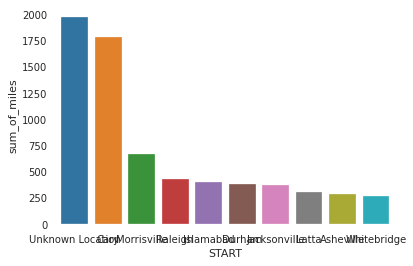

In [44]:
#Doing a quick plot 
k3 = df.groupby('START')['MILES'].sum().sort_values(ascending=False).head(10) 
k3= k3.reset_index() # flatten the dataframe 
k3.columns = ['START' ,'sum_of_miles']
%matplotlib inline 
import seaborn as sns
sns.barplot(data= k3 , x= 'START' , y ='sum_of_miles')

In [45]:
df.groupby(['START','STOP'])['MILES'].sum().sort_values(ascending=False).head()

START             STOP            
Unknown Location  Unknown Location    1360.8
Morrisville       Cary                 395.7
Cary              Durham               390.0
                  Morrisville          380.0
Raleigh           Cary                 365.7
Name: MILES, dtype: float64

In [46]:
#Dropping Unknown Location Value  - Save into another dataframe (you dont want to overwrite the original df)
df2 = df[df['START'] != 'Unknown Location']             # Makes a new dataframe, which don't have "Unknown Location" as starting point
df2 = df2[df2['STOP'] != 'Unknown Location']            # Further updates the df2 dataframe, by removing "Unknown Location" as stopping point

df2.groupby(['START','STOP'])['MILES'].sum().sort_values(ascending=False).head(10)

START         STOP        
Morrisville   Cary            395.7
Cary          Durham          390.0
              Morrisville     380.0
Raleigh       Cary            365.7
Cary          Raleigh         336.5
Durham        Cary            334.4
Latta         Jacksonville    310.3
Cary          Cary            255.9
Jacksonville  Kissimmee       201.0
Asheville     Mebane          195.9
Name: MILES, dtype: float64

The most popular start and stop pair - ( BY COUNT of travels! )

In [47]:
df2.groupby(['START','STOP'])['MILES'].size().sort_values(ascending=False).head(10)

START        STOP       
Morrisville  Cary           75
Cary         Morrisville    67
             Cary           53
             Durham         36
Durham       Cary           32
Lahore       Lahore         27
Islamabad    Islamabad      25
Cary         Raleigh        23
Raleigh      Cary           21
Kar?chi      Kar?chi        20
Name: MILES, dtype: int64

**The most popular start to destination pair is Morrisville-Cary**

## 2. Manipulating date & time objects

In [48]:
df.head()

,START_DATE,END_DATE,CAT,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


We will be using the datetime module (  https://docs.python.org/3/library/datetime.html  )

Search for "strftime() and strptime() Format Codes" in the documentation page

In [49]:
df.dtypes

START_DATE     object
END_DATE       object
CAT            object
START          object
STOP           object
MILES         float64
PURPOSE        object
dtype: object

In [50]:
# Create columns by converting the start and end date into a datatime format
# You can also over write the same column - but for the sake of understanding the difference in formats, we create new columns

from datetime import datetime                             # Import datetime library
df['start_dt'] = df['START_DATE'].apply(lambda x : datetime.strptime(x, '%m/%d/%Y %H:%M'))
df['end_dt'] = df['END_DATE'].apply(lambda x : datetime.strptime(x, '%m/%d/%Y %H:%M'))

In [51]:
df.head()             # Print first 5 rows of data.

,START_DATE,END_DATE,CAT,START,STOP,MILES,PURPOSE,start_dt,end_dt
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01 21:11:00,2016-01-01 21:17:00
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN,2016-01-02 01:25:00,2016-01-02 01:37:00
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02 20:25:00,2016-01-02 20:38:00
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05 17:31:00,2016-01-05 17:45:00
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06 14:42:00,2016-01-06 15:49:00


In [52]:
df.dtypes             # See how the dtype is different

START_DATE            object
END_DATE              object
CAT                   object
START                 object
STOP                  object
MILES                float64
PURPOSE               object
start_dt      datetime64[ns]
end_dt        datetime64[ns]
dtype: object

In [53]:
#Create more columns by using the inbuilt functionalities of datatime module

df['start_day'] = df['start_dt'].dt.day
df['start_hour'] = df['start_dt'].dt.hour
df['start_month'] = df['start_dt'].dt.month
df['d_of_wk'] = df['start_dt'].dt.dayofweek   # Days encoded as 0-6  ( monday =0, Tue =1 .... )

In [54]:
# You can convert the numeric encoding of weekdays into short form by manually writing the mapping 
# days = {0:'Mon',1:'Tue',2:'Wed',3:'Thur',4:'Fri',5:'Sat',6:'Sun'}
# df['day_of_week'] = df['day_of_week'].apply(lambda x: days[x])

#or use the builtin functions 

df['weekday'] = df['start_dt'].apply(lambda x : datetime.strftime(x,'%a'))  # ( or directly convert into the short form)

In [55]:
# Similarly you can use the calendar library to get the month abbreviation 

#import calendar
#df['start_month_cal'] = df['start_month'].apply(lambda x: calendar.month_abbr[x])

# or 
# use the built in functions in datatime module
df['cal_month'] =  df['start_dt'].apply(lambda x : datetime.strftime(x,'%b'))

In [56]:
df.head()

,START_DATE,END_DATE,CAT,START,STOP,MILES,PURPOSE,start_dt,end_dt,start_day,start_hour,start_month,d_of_wk,weekday,cal_month
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01 21:11:00,2016-01-01 21:17:00,1,21,1,4,Fri,Jan
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN,2016-01-02 01:25:00,2016-01-02 01:37:00,2,1,1,5,Sat,Jan
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02 20:25:00,2016-01-02 20:38:00,2,20,1,5,Sat,Jan
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05 17:31:00,2016-01-05 17:45:00,5,17,1,1,Tue,Jan
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06 14:42:00,2016-01-06 15:49:00,6,14,1,2,Wed,Jan


In [57]:
# Which month did he get most drives? 
df.groupby(['start_month']).size()             # Group by the month

start_month
1      61
2     115
3     113
4      54
5      49
6     108
7     112
8     133
9      36
10    106
11    122
12    146
dtype: int64

In [58]:
df.groupby('cal_month').sum()['MILES'].sort_values(ascending = False)           

cal_month
Oct    1810.0
Mar    1693.9
Aug    1335.5
Jul    1224.6
Apr    1113.0
Dec     981.3
Feb     908.2
Jun     842.8
Nov     816.9
Sep     601.8
Jan     512.9
May     363.8
Name: MILES, dtype: float64

In [59]:
# Getting the average distance covered each month
df.groupby('cal_month').mean()['MILES'].sort_values(ascending = False)

cal_month
Apr    20.611111
Oct    17.075472
Sep    16.716667
Mar    14.990265
Jul    10.933929
Aug    10.041353
Jan     8.408197
Feb     7.897391
Jun     7.803704
May     7.424490
Dec     6.721233
Nov     6.695902
Name: MILES, dtype: float64

In [60]:
# Write your inferences here based on the last 3 outputs 

In [61]:
# Which day did he get most drives? 
df.groupby(['weekday']).size()  

weekday
Fri    206
Mon    174
Sat    150
Sun    148
Thu    154
Tue    176
Wed    147
dtype: int64

**When does he usually start the trip ?**

In [62]:
df.groupby('start_hour').size()              # The number of trips started for each hour.

start_hour
0     19
1      5
2      2
3      3
5      4
6      4
7     13
8     35
9     51
10    65
11    72
12    77
13    94
14    89
15    98
16    88
17    95
18    94
19    68
20    71
21    51
22    31
23    26
dtype: int64

This looks like an interesting data 

Does he have a prefered time of start ?

In [63]:
df['start_hour'] = df['start_dt'].dt.hour

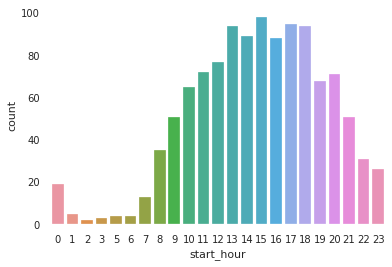

In [64]:
df_hrs = df.groupby('start_hour').size()
df_hrs = df_hrs.reset_index()
df_hrs.columns = ['start_hour' ,'count']
sns.barplot(data= df_hrs , x ='start_hour' , y = 'count')

Looks like he mostly starts the trip around 9-10 and the peak hours seem to be between 12- 5 PM 

### Duration of the trips 

In [65]:
df['diff'] = (df['end_dt'] - df['start_dt'])

In [66]:
df.dtypes

START_DATE              object
END_DATE                object
CAT                     object
START                   object
STOP                    object
MILES                  float64
PURPOSE                 object
start_dt        datetime64[ns]
end_dt          datetime64[ns]
start_day                int64
start_hour               int64
start_month              int64
d_of_wk                  int64
weekday                 object
cal_month               object
diff           timedelta64[ns]
dtype: object

This creates a timedelta datatype

### How long did the trips last 

In [67]:
df['diff_hr'] = df['diff'].astype('timedelta64[h]')

Find the date time units in  https://docs.scipy.org/doc/numpy/reference/arrays.datetime.html

search for 'Datetime Units'

In [68]:
df['diff'].describe()

count                      1155
mean     0 days 00:23:14.597402
std      0 days 00:27:19.096606
min             0 days 00:00:00
25%             0 days 00:10:00
50%             0 days 00:16:00
75%             0 days 00:27:30
max             0 days 05:36:00
Name: diff, dtype: object

In [69]:
# View in terms of minutes 
df['diff_mins'] = df['diff'].astype('timedelta64[m]')

In [70]:
df['diff_mins'].describe()

count    1155.000000
mean       23.243290
std        27.318277
min         0.000000
25%        10.000000
50%        16.000000
75%        27.500000
max       336.000000
Name: diff_mins, dtype: float64

There seems to be somethin strange with the minumum time ( in minutes ) - it is 0 

In [71]:
len(df[df['START_DATE'] == df['END_DATE']])

df[df['START_DATE'] == df['END_DATE']]

,START_DATE,END_DATE,CAT,START,STOP,MILES,PURPOSE,start_dt,end_dt,start_day,start_hour,start_month,d_of_wk,weekday,cal_month,diff,diff_hr,diff_mins
751,9/6/2016 17:49,9/6/2016 17:49,Business,Unknown Location,Unknown Location,69.1,NaN,2016-09-06 17:49:00,2016-09-06 17:49:00,6,17,9,1,Tue,Sep,0 days,0.0,0.0
761,9/16/2016 7:08,9/16/2016 7:08,Business,Unknown Location,Unknown Location,1.6,NaN,2016-09-16 07:08:00,2016-09-16 07:08:00,16,7,9,4,Fri,Sep,0 days,0.0,0.0
798,10/8/2016 15:03,10/8/2016 15:03,Business,Karachi,Karachi,3.6,NaN,2016-10-08 15:03:00,2016-10-08 15:03:00,8,15,10,5,Sat,Oct,0 days,0.0,0.0
807,10/13/2016 13:02,10/13/2016 13:02,Business,Islamabad,Islamabad,0.7,NaN,2016-10-13 13:02:00,2016-10-13 13:02:00,13,13,10,3,Thu,Oct,0 days,0.0,0.0


There are some values where the start and end dates are the same - remove them ?

In [72]:
len(df2)

944

### Speed 

In [73]:
# calculate trip speed for each trip
df['Duration_hours'] = df['diff_mins'] / 60
df['Speed'] = df['MILES'] / df['Duration_hours']
df['Speed'].describe()

count    1155.000000
mean             inf
std              NaN
min         3.917355
25%        14.888276
50%        21.000000
75%        28.569805
max              inf
Name: Speed, dtype: float64

Remove the ones with unknown location

In [74]:
# df2 = df[df.START != 'Unknown Location']
# df2 = df2[df2.STOP != 'Unknown Location']

#or 
#you can filter using one single conditional statement
df2 = df[(df.START != 'Unknown Location') & ( df.STOP != 'Unknown Location')]

In [75]:
# Remove the ones that have the same start and end time (and redo the analysis)
df2 = df[df.start_dt != df.end_dt]

# we still see some really fast driving !!
df2.sort_values(by ='diff_mins', ascending = True).head(5)

# To do 
# Take a cut off for the time taken to drive to  do the speed analysis again 
# something like (df.diff_mins > 5)
# analyse only the trips that lasted atleast 5 mins 

,START_DATE,END_DATE,CAT,START,STOP,MILES,PURPOSE,start_dt,end_dt,start_day,start_hour,start_month,d_of_wk,weekday,cal_month,diff,diff_hr,diff_mins,Duration_hours,Speed
646,8/10/2016 18:49,8/10/2016 18:50,Business,Apex,Apex,1.0,NaN,2016-08-10 18:49:00,2016-08-10 18:50:00,10,18,8,2,Wed,Aug,00:01:00,0.0,1.0,0.016667,60.0
786,10/4/2016 12:17,10/4/2016 12:18,Business,Unknown Location,Unknown Location,15.1,NaN,2016-10-04 12:17:00,2016-10-04 12:18:00,4,12,10,1,Tue,Oct,00:01:00,0.0,1.0,0.016667,906.0
789,10/6/2016 18:37,10/6/2016 18:39,Business,Unknown Location,Unknown Location,18.4,NaN,2016-10-06 18:37:00,2016-10-06 18:39:00,6,18,10,3,Thu,Oct,00:02:00,0.0,2.0,0.033333,552.0
607,7/29/2016 15:45,7/29/2016 15:47,Business,Whitebridge,Westpark Place,2.2,NaN,2016-07-29 15:45:00,2016-07-29 15:47:00,29,15,7,4,Fri,Jul,00:02:00,0.0,2.0,0.033333,66.0
44,1/26/2016 17:27,1/26/2016 17:29,Business,Cary,Cary,0.5,Errand/Supplies,2016-01-26 17:27:00,2016-01-26 17:29:00,26,17,1,1,Tue,Jan,00:02:00,0.0,2.0,0.033333,15.0


## 3. Category & Purpose

In [76]:
df['CAT'].value_counts()

Business    1078
Personal      77
Name: CAT, dtype: int64

**Most trips are in the business category**

In [77]:
#Purpose
df['PURPOSE'].value_counts()

Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: PURPOSE, dtype: int64

**Most trips are for meetings**

In [78]:
#Average distance traveled for each activity
df.groupby('PURPOSE').mean()['MILES'].sort_values(ascending = False)

PURPOSE
Commute            180.200000
Customer Visit      20.688119
Meeting             15.247594
Charity ($)         15.100000
Between Offices     10.944444
Temporary Site      10.474000
Meal/Entertain       5.698125
Airport/Travel       5.500000
Moving               4.550000
Errand/Supplies      3.968750
Name: MILES, dtype: float64

Now lets try to answer some questions from this data.

Question1: How many miles was earned per category and purpose ?

Question2: What is percentage of business miles vs personal?

Question3: How much time was spend for drives per category and purpose? 


In [79]:
#Question1: How many miles was earned per category and purpose ?
df.groupby('PURPOSE').sum()['MILES'].sort_values(ascending = False)

PURPOSE
Meeting            2851.3
Customer Visit     2089.5
Meal/Entertain      911.7
Temporary Site      523.7
Errand/Supplies     508.0
Between Offices     197.0
Commute             180.2
Moving               18.2
Airport/Travel       16.5
Charity ($)          15.1
Name: MILES, dtype: float64

In [80]:
#Question1: How many miles was earned per category and purpose ?
df.groupby('CAT').sum()['MILES'].sort_values(ascending = False)

CAT
Business    11487.0
Personal      717.7
Name: MILES, dtype: float64

In [81]:
#Question2: What is percentage of business miles vs personal?
df1 = df.groupby('CAT').agg({'MILES':'sum'})
df1
df1.apply(lambda x: x/x.sum()*100).rename(columns = {'MILES':'% of Miles'})

,% of Miles
CAT,
Business,94.119479
Personal,5.880521


In [82]:
#Question3: How much time was spend for drives per category and purpose?
dfk= df.groupby('CAT').sum()['diff_mins'].sort_values(ascending = False)
dfk.apply(lambda x: x/60)

CAT
Business    421.183333
Personal     26.250000
Name: diff_mins, dtype: float64

In [83]:
#Question3: How much time was spend for drives per category and purpose? 
df.groupby('PURPOSE').sum()['diff_mins'].sort_values(ascending = False)

PURPOSE
Meeting            5561.0
Customer Visit     3375.0
Meal/Entertain     2580.0
Errand/Supplies    1661.0
Temporary Site     1293.0
Between Offices     459.0
Commute             185.0
Airport/Travel       78.0
Moving               60.0
Charity ($)          27.0
Name: diff_mins, dtype: float64